# Анализ тарифов

# Изучение данных

In [2]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
internet = pd.read_csv('/datasets/internet.csv')

### Обработка таблицы users

In [4]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [7]:
users.duplicated().sum()

0

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

### Обработка таблицы calls

In [9]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [11]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [13]:
calls['month'] = calls['call_date'].dt.month

In [14]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [15]:
calls_pivot = calls.pivot_table(index=['user_id','month'],aggfunc={'call_date':'count', 'duration':'sum'})
calls_pivot.columns = ['calls_count', 'calls_duration']
calls_pivot.head()

calls_count  calls_duration
user_id month                             
1000    5               22           159.0
        6               43           172.0
        7               47           340.0
        8               52           408.0
        9               58           466.0

### Обработка таблицы messages

In [16]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [18]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [20]:
messages['month'] = messages['message_date'].dt.month

In [21]:
messages_pivot = messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
messages_pivot.columns = ['messages_count']
messages_pivot.head()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

### Обработка таблицы internet

In [22]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [23]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [24]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [25]:
# удаление лишнего столбца 
internet = internet.drop(columns='Unnamed: 0') 

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [27]:
internet['month'] = internet['session_date'].dt.month

In [28]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_pivot.columns = ['traffic']
internet_pivot.head()

traffic
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

### Объединение датафреймов

In [29]:
data = internet_pivot.join([calls_pivot,messages_pivot],how='outer').reset_index(level='month')
data.head()    


,month,traffic,calls_count,calls_duration,messages_count
user_id,,,,,
1000,5,2253.49,22.0,159.0,22.0
1000,6,23233.77,43.0,172.0,60.0
1000,7,14003.64,47.0,340.0,75.0
1000,8,14055.93,52.0,408.0,81.0
1000,9,14568.91,58.0,466.0,57.0


In [30]:
df = users.join(data, on='user_id')
df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,traffic,calls_count,calls_duration,messages_count
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,2253.49,22.0,159.0,22.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,23233.77,43.0,172.0,60.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,14003.64,47.0,340.0,75.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,14055.93,52.0,408.0,81.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,14568.91,58.0,466.0,57.0


In [31]:
# удаление ненужных столбцов, столбец city понадобится для дальнейшего исследования
df = df.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')


In [32]:
# добавление информации о тарифах
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',\
                      'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [33]:
# объединение датафреймов по 'tariff'
df = df.merge(tariffs, on='tariff')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   age                    3216 non-null   int64  
 2   city                   3216 non-null   object 
 3   tariff                 3216 non-null   object 
 4   month                  3214 non-null   float64
 5   traffic                3203 non-null   float64
 6   calls_count            3174 non-null   float64
 7   calls_duration         3174 non-null   float64
 8   messages_count         2717 non-null   float64
 9   messages_included      3216 non-null   int64  
 10  mb_per_month_included  3216 non-null   int64  
 11  minutes_included       3216 non-null   int64  
 12  rub_monthly_fee        3216 non-null   int64  
 13  rub_per_gb             3216 non-null   int64  
 14  rub_per_message        3216 non-null   int64  
 15  rub_

In [34]:
# проверка на пропуски получившийся датафрейм
df.isna().sum()

user_id                    0
age                        0
city                       0
tariff                     0
month                      2
traffic                   13
calls_count               42
calls_duration            42
messages_count           499
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

При проверке созданного датафрейма выявлены пропуски в столбцах:
- month (лучше удалить, так как их всего 2, и нет смысла заполнять средним или медианным значением. ОТсутствие 2-х месяцев не повлияет на дальнейшее исследование.)
- traffic (лучше заполнить нулевым значением, так как это логичнее, возможно у потребителя телефон, которы не поддерживает мобильный интернет, соответственно и отсутсвует интернет трафик)
- messages_count (также лучше заполнить нулевыми значениями, потому что потребитель может просто не писать смс, пользуется мессенджерами). 

In [35]:
# пропуске в month невозможно заполнить, поэтому лучше их удалить
df = df.dropna(subset=['month'])

In [36]:
# оставшиеся пропуски лучше заменить нулевыми значениями
df = df.fillna(0)

In [37]:
# проверка на отсутствие пропусков 
df.isna().sum()

user_id                  0
age                      0
city                     0
tariff                   0
month                    0
traffic                  0
calls_count              0
calls_duration           0
messages_count           0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

### Расчет помесячной выручки 

In [38]:
# функция для расчета помесячной выручки
def bill_month(row):
    bill_minutes = 0
    bill_sms = 0
    bill_traffic = 0
    minutes = row['calls_duration']
    sms = row['messages_count']
    traffic = row['traffic']
    tariff = row['tariff']
    minutes_limit = row['minutes_included']
    sms_limit = row['messages_included']
    traffic_limit = row['mb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']
    
    if minutes > minutes_limit:
        bill_minutes += (minutes - minutes_limit) * rub_per_minute
    if minutes < minutes_limit:
        bill_minutes = 0
    if sms > sms_limit:
        bill_sms += (sms - sms_limit) * rub_per_message
    if sms < sms_limit:
        bill_sms = 0
    if traffic > traffic_limit:
        bill_traffic += (np.ceil((traffic - traffic_limit) / 1024 )) * rub_per_gb
    if traffic < traffic_limit:
        bill_traffic = 0
    return bill_minutes + bill_sms + bill_traffic + monthly_fee
        

        

In [39]:
# Применение функции ко всему датафрейму
df['total_bill'] = df.apply(bill_month, axis=1)
df

,user_id,age,city,tariff,month,traffic,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_bill
0,1000,52,Краснодар,ultra,5.0,2253.49,22.0,159.0,22.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,Краснодар,ultra,6.0,23233.77,43.0,172.0,60.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,52,Краснодар,ultra,7.0,14003.64,47.0,340.0,75.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,Краснодар,ultra,8.0,14055.93,52.0,408.0,81.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,Краснодар,ultra,9.0,14568.91,58.0,466.0,57.0,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,Владикавказ,smart,10.0,20579.36,41.0,247.0,42.0,50,15360,500,550,200,3,3,1750.0
3212,1499,35,Пермь,smart,9.0,1845.75,9.0,70.0,11.0,50,15360,500,550,200,3,3,550.0
3213,1499,35,Пермь,smart,10.0,17788.51,68.0,449.0,48.0,50,15360,500,550,200,3,3,1150.0
3214,1499,35,Пермь,smart,11.0,17963.31,74.0,612.0,59.0,50,15360,500,550,200,3,3,1513.0


## Анализ данных

Анализ поведения клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

In [40]:
month_tariff = df.pivot_table(index=['tariff','month'], values=['calls_duration','messages_count','traffic','total_bill'],aggfunc='sum')
month_tariff = month_tariff.reset_index(level='month')
month_tariff

,month,calls_duration,messages_count,total_bill,traffic
tariff,,,,,
smart,1.0,6931.0,620.0,24525.0,289466.40
smart,2.0,17324.0,1397.0,48001.0,672629.15
smart,3.0,30034.0,2453.0,89676.0,1163020.25
smart,4.0,41119.0,3443.0,107866.0,1507764.23
smart,5.0,54618.0,4762.0,168849.0,2228530.99
smart,6.0,64885.0,5478.0,197459.0,2590322.27
smart,7.0,82079.0,6784.0,246014.0,3164373.22
smart,8.0,99045.0,7905.0,310340.0,3903519.22
smart,9.0,111439.0,8746.0,324986.0,4238930.49


Сколько минут разговора требуется пользователям каждого тарифа в месяц?

,median,mean,var,std
,calls_duration,calls_duration,calls_duration,calls_duration
tariff,,,,
smart,73482.0,77631.416667,2.491282e+09,49912.744923
ultra,44981.0,43227.000000,6.786517e+08,26050.944558


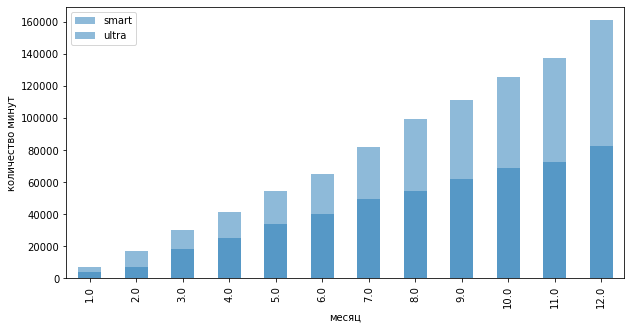

In [41]:
ax = month_tariff[month_tariff.index=='smart'].plot(x='month',y='calls_duration',kind = 'bar', figsize=(10,5), label='smart', alpha=0.5)
month_tariff[month_tariff.index=='ultra'].plot(x='month',y='calls_duration',kind = 'bar', figsize=(10,5), label='ultra', alpha=0.5, ax=ax)
plt.xlabel('месяц')
plt.ylabel('количество минут')
month_tariff.pivot_table(index = 'tariff', values = 'calls_duration', aggfunc = ['median','mean','var','std'])

На протяжении года наблюдается постепенный рост кол-ва минут разговоров клиентов независимо от тарифа. 

Сколько сообщений требуется пользователям каждого тарифа в месяц?

,median,mean,var,std
,messages_count,messages_count,messages_count,messages_count
tariff,,,,
smart,6131.0,6201.083333,1.437160e+07,3790.989687
ultra,4020.5,4051.916667,8.057361e+06,2838.549036


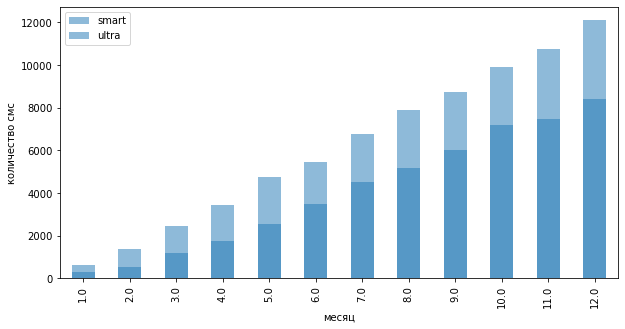

In [42]:
ax = month_tariff[month_tariff.index=='smart'].plot(x='month',y='messages_count',kind = 'bar', figsize=(10,5), label='smart', alpha=0.5)
month_tariff[month_tariff.index=='ultra'].plot(x='month',y='messages_count',kind = 'bar', figsize=(10,5), label='ultra', alpha=0.5, ax=ax)
plt.xlabel('месяц')
plt.ylabel('количество смс')
month_tariff.pivot_table(index = 'tariff', values = 'messages_count', aggfunc = ['median','mean','var','std'])

Аналогичная ситуация. Клиенты с тарифным планом Smart используют больше смс.

Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

,median,mean,var,std
,traffic,traffic,traffic,traffic
tariff,,,,
smart,2877347.745,3.010708e+06,3.665857e+12,1.914643e+06
ultra,1727400.215,1.598064e+06,9.059117e+11,9.517939e+05


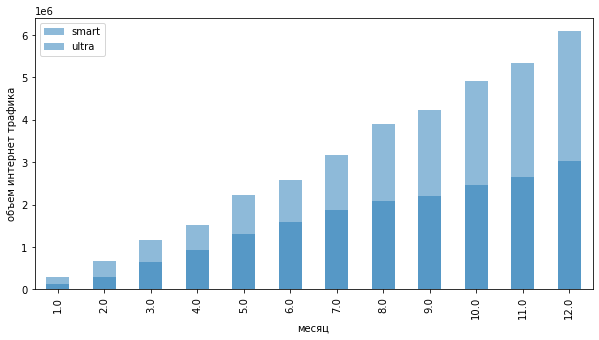

In [43]:
ax = month_tariff[month_tariff.index=='smart'].plot(x='month',y='traffic',kind = 'bar', figsize=(10,5), label='smart', alpha=0.5)
month_tariff[month_tariff.index=='ultra'].plot(x='month',y='traffic',kind = 'bar', figsize=(10,5), label='ultra', alpha=0.5, ax=ax)
plt.xlabel('месяц')
plt.ylabel('объем интернет трафика')
month_tariff.pivot_table(index = 'tariff', values = 'traffic', aggfunc = ['median','mean','var','std'])

,median,mean,var,std
,total_bill,total_bill,total_bill,total_bill
tariff,,,,
smart,221736.5,239612.583333,2.615289e+10,161718.545587
ultra,182025.0,169925.000000,8.610103e+09,92790.640447


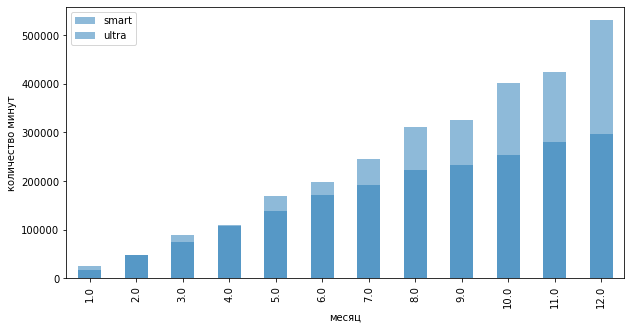

In [44]:
ax = month_tariff[month_tariff.index=='smart'].plot(x='month',y='total_bill',kind = 'bar', figsize=(10,5), label='smart', alpha=0.5)
month_tariff[month_tariff.index=='ultra'].plot(x='month',y='total_bill',kind = 'bar', figsize=(10,5), label='ultra', alpha=0.5, ax=ax)
plt.xlabel('месяц')
plt.ylabel('количество минут')
month_tariff.pivot_table(index = 'tariff', values = 'total_bill', aggfunc = ['median','mean','var','std'])

Аналогичная ситуация и с интернет трафиком. 

Проверка повышения кол-ва использования услуг к концу года. С чем связано? С кол-вом пользователей или с их возрастающей активностью?

<AxesSubplot:xlabel='month'>

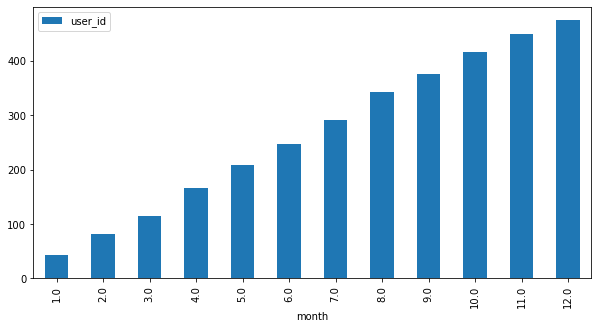

In [45]:
users_per_month = df.pivot_table(index='month', values='user_id', aggfunc='count')
users_per_month = users_per_month.reset_index(level='month')
users_per_month.plot(x='month',y='user_id',kind = 'bar', figsize=(10,5))

По графику видно, что число клиентов ежемесячно растет. С этим и связан рост потребления услуг по тарифам. 

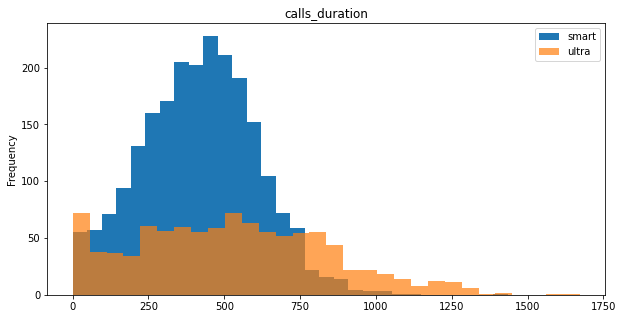

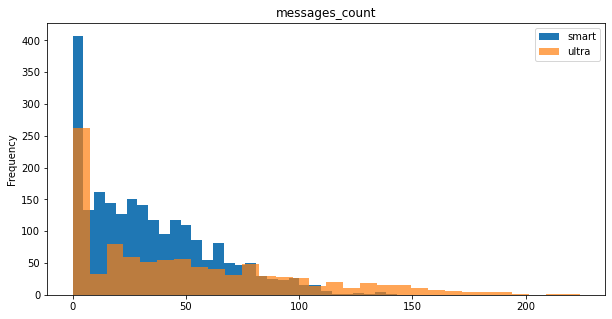

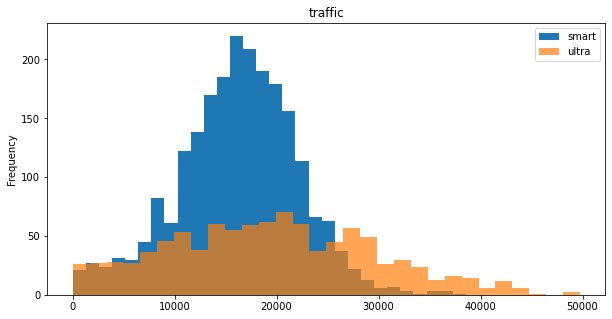

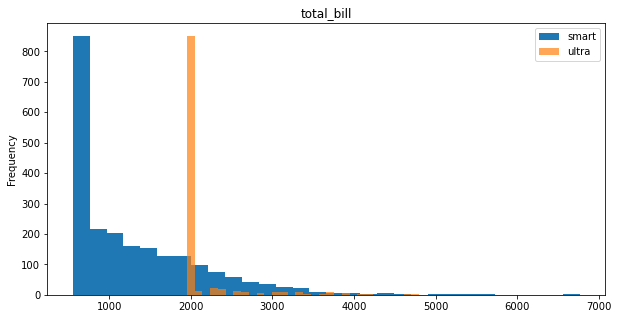

In [46]:
list_of_columns=['calls_duration','messages_count','traffic', 'total_bill']
tariff = ['ultra','smart']
for column in list_of_columns:
        df.loc[df.loc[:,'tariff'] == 'smart'][column].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            label = 'smart', figsize = (10,5)
                                                                           )
        df.loc[df.loc[:,'tariff'] == 'ultra'][column].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            alpha = 0.7,
                                                                            label = 'ultra',figsize = (10,5)
                                                                           )
        plt.title(column)
        plt.legend()
        plt.show()

Изучив графики, можно сделать вывод:
Что касается длительности звонков, то клиенты с тарифным планом "Ультра" в большинстве не выговаривают минуты по тарифному плану. А пользователи тарифного плана "Смарт" зачастую выываливаются за рамки тарифа.
Что касается колличества сообщений, то есть маленькая доля пользователей тарифа "Смарт", которым нужны дополнительные смс вне тарифа. Что же касается пользователей тарифа "Ультра", то они используют не больше 200 смс. 
Что касается интернет трафика, то в среднем пользователям нужно от 38 до 43 Гб. в месяц. Пользователи обоих тарифов прибегают к дополнительным Гб, но в большей степени это пользователи тарифа "Смарт" - большинству нужно около 43 ГБ, что в 2,5 раза больше тарифного плана. 
На основании вышеизложенного, можно с уверенностью сказать, что пользователи тарифного плана "Ультра" укладываются в тарифный план, очень редко переплачивают, и в основном за интернет трафик. А пользователи тарифного плана "Смарт" переплачивают и за мобильный интерент, и за звонки и реже за смс. 

In [47]:
df.query('tariff == "ultra"')['total_bill'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: total_bill, dtype: float64

In [48]:
df.query('tariff == "smart"')['total_bill'].describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: total_bill, dtype: float64

In [49]:
df.pivot_table(index = 'tariff', values = ['calls_duration',
                                                        'messages_count',
                                                        'traffic','total_bill'], aggfunc = ['median',
                                                                                     'mean',
                                                                                     'var',
                                                                                     'std'])

median                                               mean  \
       calls_duration messages_count total_bill   traffic calls_duration   
tariff                                                                     
smart           422.0           28.0     1023.0  16506.84     417.934948   
ultra           518.0           38.0     1950.0  19308.01     526.623350   

                                                            var  \
       messages_count   total_bill       traffic calls_duration   
tariff                                                            
smart       33.384029  1289.973531  16208.386990   36219.315784   
ultra       49.363452  2070.152284  19468.805208  100873.633397   

                                                              std  \
       messages_count     total_bill       traffic calls_duration   
tariff                                                              
smart      796.812958  669785.708006  3.446250e+07     190.313730   
ultra     2285.266143  141516.745079  1.017510e+08     317.606098   

                                                 
       messages_count  total_bill       traffic  
tariff                                           
smart       28.227876  818.404367   5870.476681  
ultra       47.804457  376.187114  10087.170752

# Проверка гипотез

Первая гипотеза для проверки:
    "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются."

Нулевая гипотеза:
Средняя выручка поьзователей тарифов «Ультра» и «Смарт» одинаковы.

Альтернативная гипотеза:
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [50]:
# проверка гипотезы 
smart = df[df['tariff']=='smart']['total_bill']
ultra = df[df['tariff']=='ultra']['total_bill']


alpha = 0.05

results = st.ttest_ind(smart, ultra, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


p-значение меньше 5%, соответственно средняя выручка пользователей smart и ultra различаются. 

Вторая гипотеза для проверки: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов."

Нулевая гипотеза:
Средняя выручка пользователей из Москвы такая же как и выручка пользователей из других регионов. 

Альтернативная гипотеза:
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [51]:
# проверка гипотезы
moscow = df[df['city']=='Москва']['total_bill']
regions = df[df['city']!='Москва']['total_bill'].mean()

alpha = 0.05

results = st.ttest_1samp(moscow,regions)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4744239730695693
Не получилось отвергнуть нулевую гипотезу


p-значение гораздо больше 5%, значит средняя выручка пользователей из Москвы такая же как и выручка пользователей из других регионов.

# Общий вывод

Было проведено исследование тарифных планов смарт и ультра. 
Средние чеки данных планов различаются. Пользователи тарифного плана смарт платят меньше. Что качается средней выручки, то она не отличается в зависимости от региона. Клиенты к концу года увеливают потребление услуг тарифных планов. Для компании более выгодный тариф ультра.
